In [18]:
#import required libraries
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
#function to read prediction data file. Generally expeceted to have format of label,probability score
def read_pred_file(fl_name):
    df = pd.read_csv( fl_name)
    col1 = df.columns[0]
    print("[%d] records loaded from File[%s] " % (df[col1].count(),fl_name))
    
    return df

In [11]:
#set key variables.
ddir = '/disk1/data1/data/models/inception/'
model_name = 'incep_basic_lr01.cpkt'
steps = '99999'
pred_df_fl = ddir + model_name + '-' + steps + '_df.csv'


In [12]:
#load data
pred_df = read_pred_file(pred_df_fl)

[67108864] records loaded File[/disk1/data1/data/models/inception/incep_basic_lr01.cpkt-99999_df.csv] 


In [14]:
#check data
print("Data columns: ",pred_df.columns)
print(pred_df.head())

Data columns:  Index(['label', 'prob'], dtype='object')
   label      prob
0    0.0  0.497421
1    0.0  0.504194
2    0.0  0.495502
3    0.0  0.501759
4    0.0  0.500794


In [16]:
#calculate ROC specific details and plot the grpah
fpr, tpr, _ = metrics.roc_curve(pred_df.label,  pred_df.prob)
auc = metrics.roc_auc_score(pred_df.label,  pred_df.prob)


NameError: name 'plt' is not defined

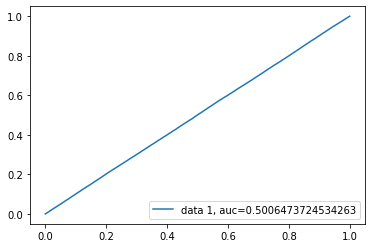

In [19]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
#Prepare predcition for confusion matrix. create prediction using optimal threshold, in our case threshold is .5
threshold = .5
pred_df['pred'] = pred_df.prob.apply(lambda x: 0. if x < threshold else 1.)

In [45]:
#print confusion matrix.
total = pred_df.label.count()
#tn, fp, fn, tp = metrics.confusion_matrix(pred_df.label,pred_df.pred1).ravel()
print(" tp: ",tp/total," fp: ",fp/total)
print(" fn: ",fn/total," tn: ",tn/total)
tot_1s = pred_df[(pred_df.label == 1.)]['label'].count()
tot_0s = pred_df[(pred_df.label == 0.)]['label'].count()
print(" Total labels 1's: ",tot_1s," Total labels 0's: ",tot_0s)
print(" % labels 1's: ",tot_1s/total," % labels 0's: ",tot_0s/total)
print(" tp 1's : ",pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 1.)]['label'].count()/tot_1s)
print(" tp 0's : ",pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 0.)]['label'].count()/tot_0s)

 tp:  0.5308146625757217  fp:  0.01801346242427826
 fn:  0.43625687062740326  tn:  0.01491500437259674
 Total labels 1's:  64899072  Total labels 0's:  2209792
 % labels 1's:  0.967071533203125  % labels 0's:  0.032928466796875
 tp 1's :  0.0
 tp 1's :  0.0


In [46]:
print(pred_df.head())
print(pred_df.pred1.unique())
print(pred_df.label.unique())

   label      prob  pred  pred1
0    0.0  0.497421   0.0    0.0
1    0.0  0.504194   1.0    1.0
2    0.0  0.495502   0.0    0.0
3    0.0  0.501759   1.0    1.0
4    0.0  0.500794   1.0    1.0
[0. 1.]
[0. 1.]


In [37]:
#pred_df['pred'] = pred_df.apply(lambda row: 0. if row['pred'] < .5 else 1.)
pred_df['pred1'] = pred_df.pred.apply(lambda x: 0. if x < .5 else 1.)